## Importing Dependencies

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyploy as plt
import numpy as np
import pandas as pd
import datetime as dt

In [30]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

ORM allows you to create classes in your code that can be mapped to specific tables given in a database.
It allows us to create a special type of system called `decoupled` system.
This also prevents our entire code from breaking because it reduces the number of relationships between coding components.
With ORM, our references will be to classes in the code instead of specific tables in the database

## Database Setup

In [23]:
#Connect to the SQLite database by using the create_engine() function.
#The function doesn't actually connect to the database; it just prepares the database files to be connected later on.
engine = create_engine("sqlite:///hawaii.sqlite")

In [25]:
# Reflect an existing database into a new model
# Reflecting a database into a new model means to transfer the contents of the database into a different structure of data.
# Automap Base creates a base class for an automap schema in SQLAlchemy. It sets up a foundation for the code to be built upon.
Base = automap_base()

# Reflect the tables
# This reflects the schema of the SQLite tables into the code and creates mappings.
# Reflecting the table ensures that our code is separated that if other classes or systems want to interact with it,
# they can interact with only specific subsets of data instead of the whole dataset.
Base.prepare(engine, reflect=True)

In [26]:
# We can view all of the classes that automap found using the Bases.classes.keys() function
# Base.classes gives us access to all classes
# keys() references all the names of the classes
Base.classes.keys()

['measurement', 'station']

In [27]:
# Save references to each table using Base.classes.<class name>
# Giving classes new variable names can save us time when we want to reference the measurement or station classes
Measurement = Base.classes.measurement
Station = Base.classes.station

#Capitalizing these variables help indicate that they're a reference to a Base.classes

In [31]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Exploratory Climate Analysis

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
# dt.timedelta() allows us to trace back a certain number of days
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# Begin by creating a variable to store the results of the query
results = []

# Add the session that we created earlier to query our database
results = session.query(Measurement.date, Measurement.prcp)

# Print everything that is returned in the query
print(results.all())

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [35]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Start by creating a dataframe variable. In order to save our results as a dataframe,
# we need to provide our results variable as one parameter and specify the column names as our second parameter
df = pd.DataFrame(results, columns=['date', 'precipiation'])

# Set the inplace=True to indicate that we don't want to create a new dataframe with the modified specifications
df.set_index(df['date'], inplace=True)

# Since setting the index to the date gives us two date columns, we can remove the index when we print to view the dataframe
print(df.to_string(index=False, max_rows=20))


      date  precipiation
2010-01-01          0.08
2010-01-02          0.00
2010-01-03          0.00
2010-01-04          0.00
2010-01-06           NaN
2010-01-07          0.06
2010-01-08          0.00
2010-01-09          0.00
2010-01-10          0.00
2010-01-11          0.01
       ...           ...
2017-08-14          0.22
2017-08-15          0.42
2017-08-16          0.42
2017-08-17          0.13
2017-08-18           NaN
2017-08-19          0.09
2017-08-20           NaN
2017-08-21          0.56
2017-08-22          0.50
2017-08-23          0.45


In [41]:
# Sort the dataframe by date
df=df.sort_index()
print(df.to_string(index=False))

      date  precipiation
2010-01-01          0.08
2010-01-01          0.21
2010-01-01          0.15
2010-01-01          0.15
2010-01-01          0.05
2010-01-01          0.14
2010-01-01          0.28
2010-01-02          0.00
2010-01-02          0.00
2010-01-02          0.00
2010-01-02          0.02
2010-01-02          0.00
2010-01-02          0.00
2010-01-02          0.00
2010-01-03          0.00
2010-01-03          0.00
2010-01-03          0.00
2010-01-03          0.00
2010-01-03          0.00
2010-01-03          0.00
2010-01-03          0.00
2010-01-04          0.00
2010-01-04          0.00
2010-01-04          0.00
2010-01-04          0.00
2010-01-04          0.00
2010-01-04          0.00
2010-01-04          0.01
2010-01-05          0.00
2010-01-05          0.00
2010-01-05          0.02
2010-01-05          0.00
2010-01-05          0.00
2010-01-05          0.01
2010-01-06          0.08
2010-01-06          0.01
2010-01-06           NaN
2010-01-06          0.11
2010-01-06          0.36


<AxesSubplot:xlabel='date'>

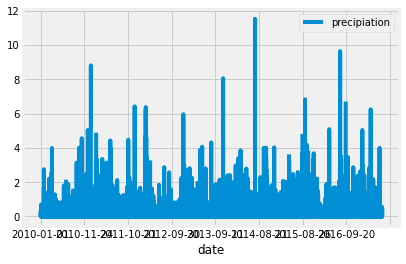

In [42]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipiation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [44]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

#Start by creating a query
#Use the func.count to count the total number of stations
#To reference stations, use Station.station, which gives us the number of stations
#Add .all() to the end of the query so that the results are returned as a list

[(9,)]

In [47]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

#Start by creating a query
#List the stations and the counts
#Use group_by() to group the data by station name
#Use order_by() to order the results in the order that we specify
#Add the .all() function to return all results

#------ Results ------
#Left column: station ID
#Right column: counts for each station. Counts indicate which stations are most active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

# To look at a specific station, add a filter with the station ID
#The results show that the low temp is 54 degrees, high temp is 85 degrees and average temp is 71.7 degrees

[(54.0, 85.0, 71.66378066378067)]

In [51]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

print(results)

# Add Measurement.tobs to get the total observations count
# Filter out all the stations except the most active station
# Apply another filter to view only the most recent year
# To view the results, we will need to add a print statement around it

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [52]:
# Convert the temperature observation results to a dataframe
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


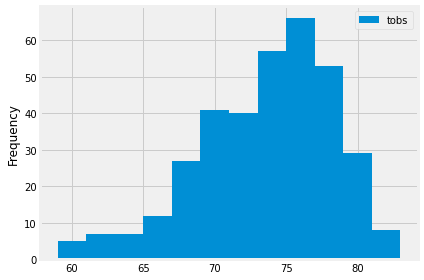

In [53]:
# Create a histogram with the temperature observations
df.plot.hist(bins=12)

# This compresses the x-axis labels so they fit into the box holding the plot
plt.tight_layout()